<h1> Objective </h1>
<blockquote>
    
Predict the class of breast cancer (malignant or ‘bad’ versus benign or ‘good’) from the features of images taken from breast samples.
    
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set()

<h2> Loading in dataset </h2>


In [3]:
cancer_df =  pd.read_csv('data/cancer.data', sep=",")

<h2> Examining the dataset </h2>


In [5]:
cancer_df.isnull().sum()

1000025    0
5          0
1          0
1.1        0
1.2        0
2          0
1.3        0
3          0
1.4        0
1.5        0
2.1        0
dtype: int64

There aren't any null values or empty columns.

In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [7]:
cancer_df.drop(['1000025'],axis=1,inplace=True)

<blockquote>

All the columns are of type integer execpt for 1.3. I'll have to change that later on to int so that I can use it to create a model. The first column *1000025* which is the ID column I'll drop as it won't give us any information as to how to predict the class of breast cancer.

</blockquote>


In [8]:
# Replace the '?'s with NaN
cancer_df = cancer_df.replace('?', np.nan)

# Inspect the missing values again
# ... YOUR CODE FOR TASK 3 ...
cancer_df.isnull().sum()

5       0
1       0
1.1     0
1.2     0
2       0
1.3    16
3       0
1.4     0
1.5     0
2.1     0
dtype: int64

<blockquote>
    The data contains <b>"?"</b> in the 1.3 column which will create a problem when we try and build a model as a logistic regression model can only be built with numeric data types. So I'll replace the question marks with <b>Nan</b> values and then fill them with the mode value.
    </blockquote>

In [9]:
cancer_df.fillna({"1.3":cancer_df["1.3"].value_counts().index[0]}, inplace=True)

In [10]:
cancer_df.isnull().sum()

5      0
1      0
1.1    0
1.2    0
2      0
1.3    0
3      0
1.4    0
1.5    0
2.1    0
dtype: int64

In [11]:
cancer_df = cancer_df.astype({"1.3": int})

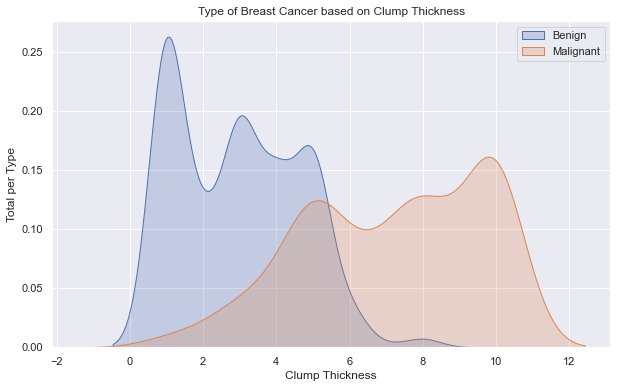

In [12]:
plt.figure(figsize=(10,6))
sns.kdeplot(cancer_df[cancer_df['2.1'] == 2]['5'], shade=True,label="Benign")
sns.kdeplot(cancer_df[cancer_df['2.1'] == 4]['5'], shade=True,label="Malignant")
plt.title('Type of Breast Cancer based on Clump Thickness')
plt.ylabel('Total per Type')
plt.xlabel('Clump Thickness')
plt.legend(['Benign','Malignant'])

<blockquote>

Looking at this this graph we can see that when clump thickness>5 it is highly likely that it is malignant. As the clump thickness increases it is even more likely that it will be Malignant. When clump thickness < 5 it is more likely that the tumor is benign. 

</blockquote>


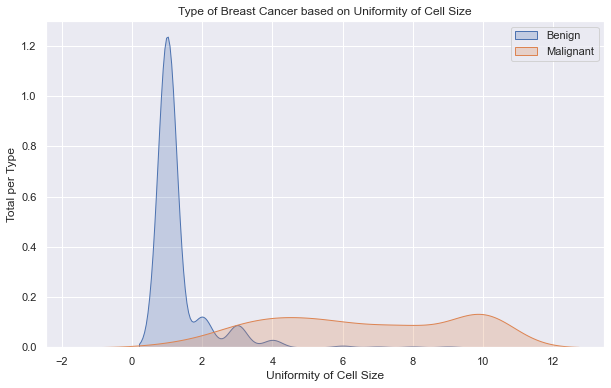

In [13]:
plt.figure(figsize=(10,6))
sns.kdeplot(cancer_df[cancer_df['2.1'] == 2]['1'], shade=True,label="Benign")
sns.kdeplot(cancer_df[cancer_df['2.1'] == 4]['1'], shade=True,label="Malignant")
plt.title('Type of Breast Cancer based on Uniformity of Cell Size')
plt.ylabel('Total per Type')
plt.xlabel('Uniformity of Cell Size')
plt.legend(['Benign','Malignant'])

<bLockquote>
    This would be a good feature to use for modelling. Looking at this graph we can see that it would be a good classifier for 
    Bening or Malignant tumors. With Uniformity of Cell Size above 3 most likely being Malignant and anything below that being Benign.
</blockquote>

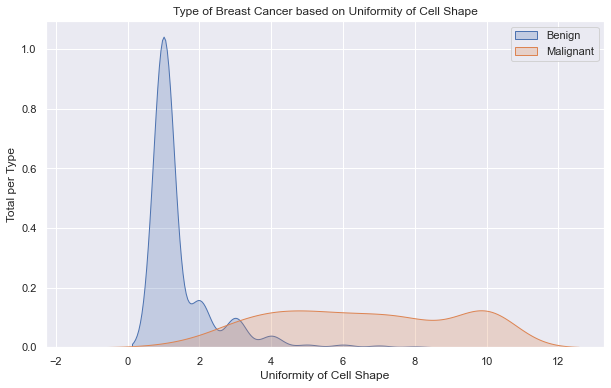

In [14]:
plt.figure(figsize=(10,6))
sns.kdeplot(cancer_df[cancer_df['2.1'] == 2]['1.1'], shade=True,label="Benign")
sns.kdeplot(cancer_df[cancer_df['2.1'] == 4]['1.1'], shade=True,label="Malignant")
plt.title('Type of Breast Cancer based on Uniformity of Cell Shape')
plt.ylabel('Total per Type')
plt.xlabel('Uniformity of Cell Shape')
plt.legend(['Benign','Malignant'])

<bLockquote>
    This would be a good feature to use for modelling. Looking at this graph we can see that it would be a good classifier for 
    Bening or Malignant tumors. With Uniformity of Cell Shape above 3 most likely being Malignant and anything below that being Benign.
</blockquote>

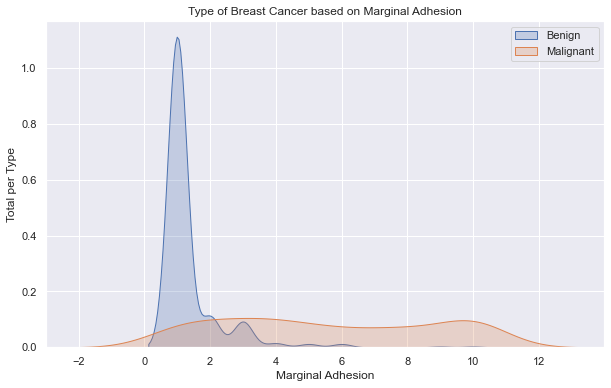

In [15]:
plt.figure(figsize=(10,6))
sns.kdeplot(cancer_df[cancer_df['2.1'] == 2]['1.2'], shade=True,label="Benign")
sns.kdeplot(cancer_df[cancer_df['2.1'] == 4]['1.2'], shade=True,label="Malignant")
plt.title('Type of Breast Cancer based on Marginal Adhesion')
plt.ylabel('Total per Type')
plt.xlabel('Marginal Adhesion')
plt.legend(['Benign','Malignant'])

<bLockquote>
    This would be a good feature to use for modelling. Looking at this graph we can see that it would be a good classifier for 
    Bening or Malignant tumors. With Marginal Adhesion above 3 most likely being Malignant and anything below that being Benign.
</blockquote>

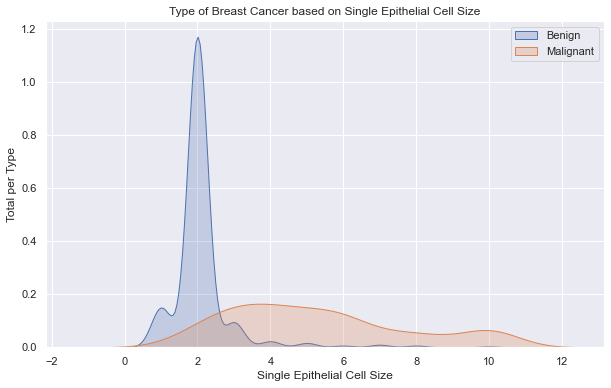

In [16]:
plt.figure(figsize=(10,6))
sns.kdeplot(cancer_df[cancer_df['2.1'] == 2]['2'], shade=True,label="Benign")
sns.kdeplot(cancer_df[cancer_df['2.1'] == 4]['2'], shade=True,label="Malignant")
plt.title('Type of Breast Cancer based on Single Epithelial Cell Size')
plt.ylabel('Total per Type')
plt.xlabel('Single Epithelial Cell Size')
plt.legend(['Benign','Malignant'])

<bLockquote>
    This would be a good feature to use for modelling. Looking at this graph we can see that it would be a good classifier for 
    Bening or Malignant tumors. With Single Epithelial Cell Size above 3 most likely being Malignant and anything below that being Benign.
</blockquote>

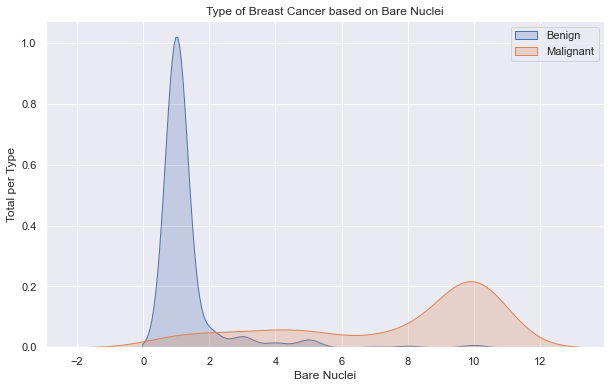

In [17]:
plt.figure(figsize=(10,6))
sns.kdeplot(cancer_df[cancer_df['2.1'] == 2]['1.3'], shade=True,label="Benign")
sns.kdeplot(cancer_df[cancer_df['2.1'] == 4]['1.3'], shade=True,label="Malignant")
plt.title('Type of Breast Cancer based on Bare Nuclei')
plt.ylabel('Total per Type')
plt.xlabel('Bare Nuclei')
plt.legend(['Benign','Malignant'])

<bLockquote>
    This would be a good feature to use for modelling. Looking at this graph we can see that it would be a good classifier for 
    Bening or Malignant tumors. With Bare Nuclei above 3 most likely being Malignant and anything below that being Benign.
</blockquote>

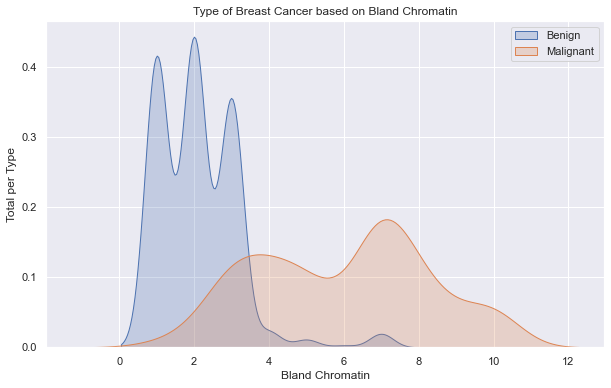

In [18]:
plt.figure(figsize=(10,6))
sns.kdeplot(cancer_df[cancer_df['2.1'] == 2]['3'], shade=True,label="Benign")
sns.kdeplot(cancer_df[cancer_df['2.1'] == 4]['3'], shade=True,label="Malignant")
plt.title('Type of Breast Cancer based on Bland Chromatin')
plt.ylabel('Total per Type')
plt.xlabel('Bland Chromatin')
plt.legend(['Benign','Malignant'])

<bLockquote>
    This would be a good feature to use for modelling. Looking at this graph we can see that it would be a good classifier for 
    Bening or Malignant tumors. With Bland Chromatin above 3 most likely being Malignant and anything below that being Benign.
</blockquote>

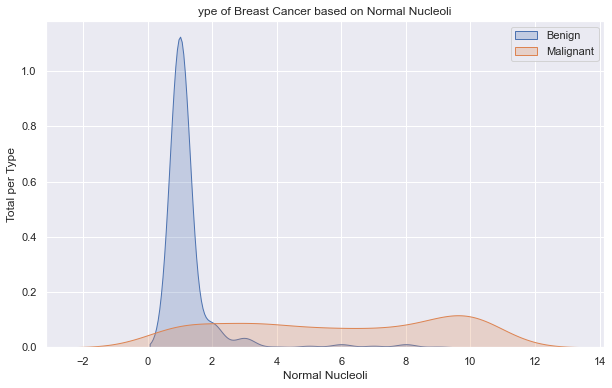

In [19]:
plt.figure(figsize=(10,6))
sns.kdeplot(cancer_df[cancer_df['2.1'] == 2]['1.4'], shade=True,label="Benign")
sns.kdeplot(cancer_df[cancer_df['2.1'] == 4]['1.4'], shade=True,label="Malignant")
plt.title('ype of Breast Cancer based on Normal Nucleoli')
plt.ylabel('Total per Type')
plt.xlabel('Normal Nucleoli')
plt.legend(['Benign','Malignant'])

<bLockquote>
    This would be a good feature to use for modelling. Looking at this graph we can see that it would be a good classifier for 
    Bening or Malignant tumors. With Normal Nucleoli above 3 most likely being Malignant and anything below that being Benign.
</blockquote>

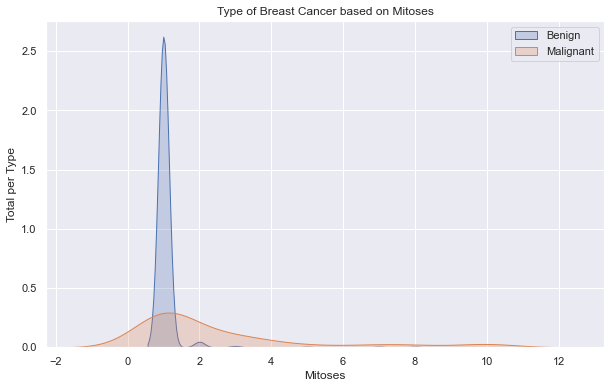

In [20]:
plt.figure(figsize=(10,6))
sns.kdeplot(cancer_df[cancer_df['2.1'] == 2]['1.5'], shade=True,label="Benign")
sns.kdeplot(cancer_df[cancer_df['2.1'] == 4]['1.5'], shade=True,label="Malignant")
plt.title('Type of Breast Cancer based on Mitoses')
plt.ylabel('Total per Type')
plt.xlabel('Mitoses')
plt.legend(['Benign','Malignant'])

<blockquote>
    This would not be a good feature to use as it has an undercoverage bias. From 2 onwards the reasearch population is not being represented accurately. There is not enough data that has been collected in order for us to determine if there actually is a relationship between Breat Cancer and Mistoses. There is a high concentration of data around one. That in and of it self is not enough in order for us to predict future samples. Adding this to the model will make it learn in correct biases that will cause it to make incorrect predictions in the future.
   </blockquote>

<h1> Splitting Data </h1>

In [21]:
x = cancer_df[['5', '1', '1.1', '1.2', '2','1.3', '3', '1.4', '2.1']]
y = cancer_df['2.1']

<h1> Modelling </h1>

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [23]:
LogReg = LogisticRegression(random_state=1, solver='lbfgs').fit(x_train, y_train)

In [24]:
y_pred = LogReg.predict(x_test)
x_pred = LogReg.predict(x_train)

print("Test acurracy {}".format(accuracy_score(y_test,y_pred)))
print("Train acurracy {}".format(accuracy_score(y_train,x_pred)))

Test acurracy 1.0
Train acurracy 1.0


<blockquote>
    The model has 100% accuracy meaning that its performing perfectly. I think maybe because the data was designed this way. It is highly unlikely to get a perfectly performing model in real life situations. This is the best model I choose as when I would remove or add features I would either be over or underfitted. This was the only case in which that didn't happen. 
    </blockquote>

Text(0.5, 257.44, 'Predicted label')

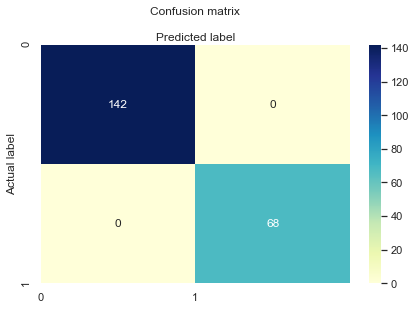

In [25]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set(yticks=[0, 2], 
       xticks=[0, 1], 
       yticklabels=class_names, 
       xticklabels=class_names)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<blockquote>
    
We have <b>142 True Negatives</b> and there are <b>0 False Positives</b>. We have <b>0 False Negatives</b>, and there are <b>68 True Positives</b>. Overall the model is identifying each and value correctly.  
    
</blockquote>

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       142
           4       1.00      1.00      1.00        68

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



<blockquote>

The precision score 1 meaning that all of the predicted cases were correct. The recall score is 1 meaning that all of the observed cases were correctly predicted. We have an f1 score of 1. Overall looking at these scores we can see that the model is not performing well. I have high precision and low recall meaning that this model will correctly identify each and every case presented to it.

</blockquote>

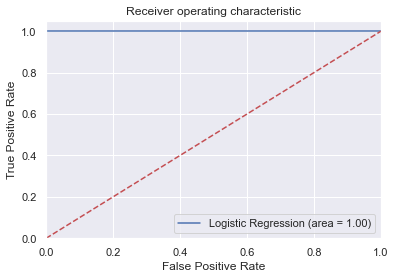

In [27]:
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test.map({2: 0, 4: 1}), LogReg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

<blockquote>
    Looking at the ROC curve and the area = 1 under the ROC curve we can see that the model is performing perfectly.

</blockquote>